# Facial recognition

El grupo de entrenamiento facial esta formado por :
'angelina_jolie', 'barack_obama', 'billie_eilish', 'chris_hemsworth', 'donald_trump', 'dwayne_johnson', 'gabrielle_union', 'jennifer_lawrence', 'jordan_michael', 'kawhi_leonard', 'keanu_reeves', 'keyli_jenner', 'lil_peep', 'naomi_scott', 'rafael_nadal', 'roger_federer', 'scarlett_johansson', 'selena_gomez', 'taylor_swift', 'Xi_Jinping'


In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import fastai as fai
import fastai.vision as fv


In [3]:
import os
import glob

In [4]:
import PIL
import textwrap
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw

# Data

In [5]:
!ls caras


models	train  valid


In [6]:
!ls caras/train/billie_eilish

108_Single_OnlineImage30.jpg
108_Single_OnlineImage31.jpg
108_Single_OnlineImage32.jpg
1272848.jpg
1554213686_790454_1554213877_noticia_normal.jpg
15553476540202.jpg
1561612667_246478_1561612775_noticia_normal.jpg
1567495707_726775_1567501904_noticia_normal.jpg
16x9_billie_eilish_e1506443270472.jpg
170px_Billie_Eilish_MTV_2019_2_(cropped).png
1_Tout.jpg
2.43116365.jpg
26.jpg
3645.jpg
3720257e_3106_4185_8811_55465bc8bf59.jpeg
37274.jpg
450_1000.jpg
5327.jpg
56973906_1031440620389086_5150401069125206016_o.0.jpg
5d10e5939c5101174c54bb98_750_563.jpg
5d71401f6f24eb04b07dbdf3_750_563.jpg
5d7aa0dceeeae.image.jpg
61ca1dcbc2cdda2af430927f4fe4b98c_404x475.jpg
8O0dH3QK_400x400.jpg
_97005206_0862637b_0fab_4fdc_a421_b4a5cf82d290.jpg
be.jpg
BFA_28810_3760334.jpg
billie (1).jpg
billie_apple_session.jpg
Billie_Eilish_1_1024x664.jpg
billie_eilish (1).jpg
Billie_Eilish_2018_portrait_govball.jpg
Billie_Eilish_2019_by_Glenn_Francis.jpg
billie_eilish_2019.jpg
Billie_Eilish_2 (1).jpg
Billie_Eilish_2.jpg
Bil

In [7]:
tfms = fv.get_transforms(fv.get_transforms(max_warp=0.))

In [8]:
def load_data(folder, img_size, batch_size):
    data = (fv.ImageList
            .from_folder(folder)
            .split_by_folder()
            .label_from_folder()
            .transform(tfms,size=img_size)
            .databunch(bs=batch_size)
            .normalize(fv.imagenet_stats))
    return data

In [9]:
data = load_data("caras", img_size=224, batch_size=32)

In [10]:
data.dl

<bound method DataBunch.dl of ImageDataBunch;

Train: LabelList (1629 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
donald_trump,donald_trump,donald_trump,donald_trump,donald_trump
Path: caras;

Valid: LabelList (191 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
donald_trump,donald_trump,donald_trump,donald_trump,donald_trump
Path: caras;

Test: None>

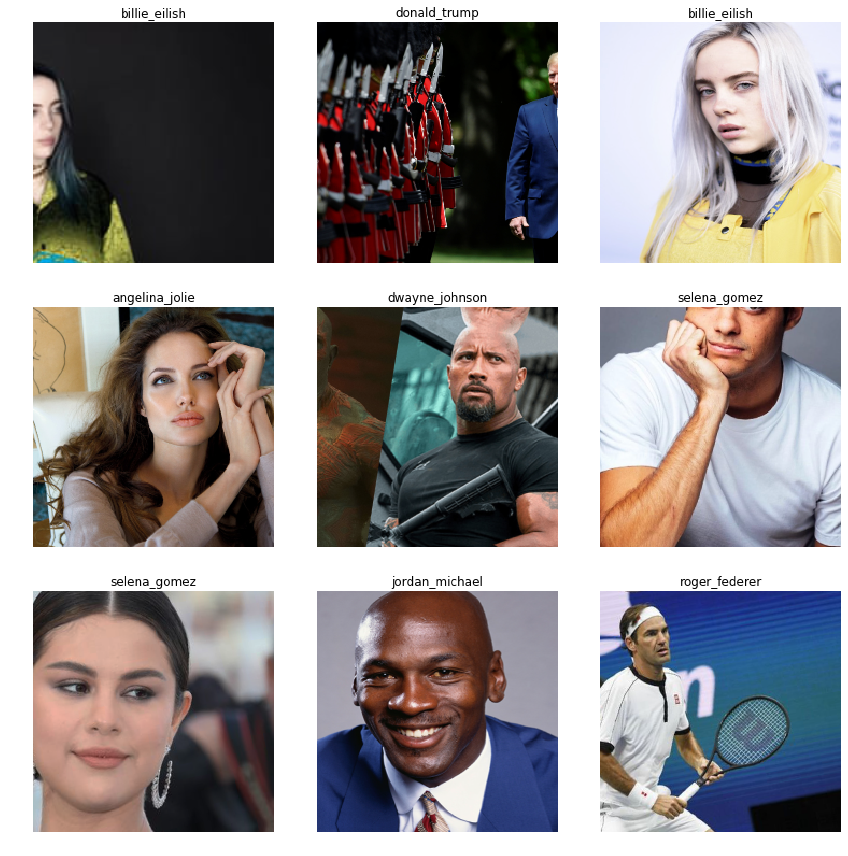

In [11]:
data.show_batch(rows=3)

# Model: Resnet 50¶

In [12]:
learner = fv.cnn_learner(data, fv.models.resnet50,  metrics=[fai.metrics.accuracy, fai.metrics.error_rate], wd=0.1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


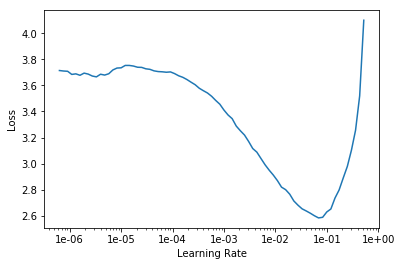

In [13]:
learner.lr_find(); learner.recorder.plot()

In [14]:
learner.fit_one_cycle(1,wd=0.1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.635166,0.974376,0.685864,0.314136,00:36


In [16]:
learner.fit_one_cycle(4, max_lr=slice(4e-6, 4e-2), wd=0.15)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.326058,1.651308,0.575916,0.424084,00:40
1,1.565626,1.007635,0.675393,0.324607,00:37
2,1.215611,0.894619,0.732984,0.267016,00:34
3,0.897621,0.681934,0.790576,0.209424,00:34


In [17]:
learner.fit_one_cycle(6,max_lr=1e-5,wd=0.1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.628562,0.701173,0.774869,0.225131,00:35
1,0.624652,0.690256,0.774869,0.225131,00:35
2,0.633593,0.752611,0.769634,0.230366,00:36
3,0.650503,0.684696,0.774869,0.225131,00:34
4,0.649430,0.714361,0.769634,0.230366,00:36
5,0.638616,0.677067,0.795812,0.204188,00:36


In [ ]:
fai.metrics.accuracy(*learner.TTA())

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


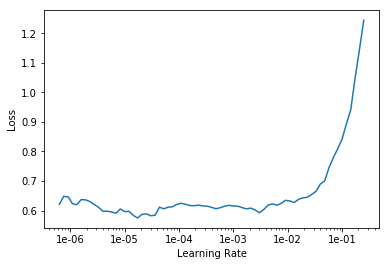

In [18]:
learner.lr_find(); learner.recorder.plot()

In [19]:
learner.fit_one_cycle(6,max_lr=1e-3,wd=0.1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.638753,0.735187,0.801047,0.198953,00:33
1,0.592007,0.650872,0.785340,0.214660,00:36
2,0.543711,0.590351,0.816754,0.183246,00:34
3,0.478440,0.567289,0.816754,0.183246,00:34
4,0.466784,0.552885,0.821990,0.178010,00:36
5,0.434440,0.573403,0.827225,0.172775,00:34


In [20]:
learner.save('cara1')

In [21]:
learner.unfreeze() 

In [22]:
learner.fit_one_cycle(4, max_lr=slice(4e-7, 4e-4), wd=0.15)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.431352,0.531405,0.842932,0.157068,00:34
1,0.404348,0.657136,0.816754,0.183246,00:35
2,0.368570,0.528815,0.842932,0.157068,00:35
3,0.340431,0.498318,0.837696,0.162304,00:35


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


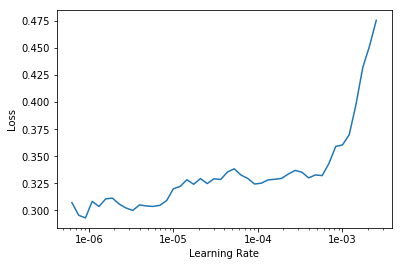

In [23]:
learner.lr_find(); learner.recorder.plot()

In [24]:
learner.fit_one_cycle(4, max_lr=slice(4e-6, 4e-4), wd=0.15)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.336103,0.485551,0.853403,0.146597,00:36
1,0.303926,0.466813,0.848168,0.151832,00:35
2,0.251597,0.447888,0.869110,0.130890,00:33
3,0.199672,0.488448,0.863874,0.136126,00:35


In [25]:
fai.metrics.accuracy(*learner.TTA())

tensor(0.8953)

# Accuracy Model 89%

In [26]:
learner.save('cara2')

In [27]:
interp = learner.interpret()

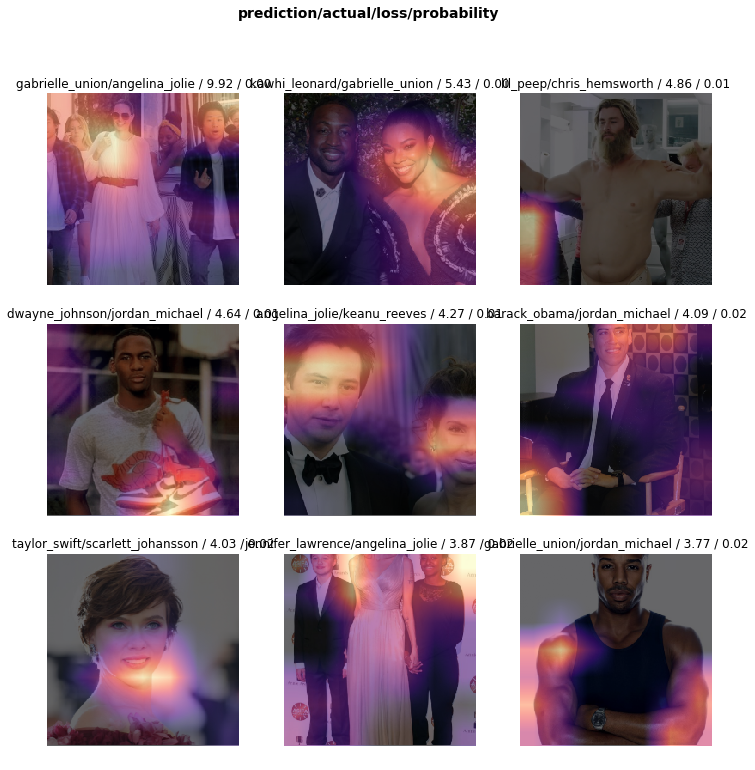

In [31]:
interp.plot_top_losses(9)

In [34]:
learner.export()